# EXPORTING THE DATA OF US COLLEGES

### 1. Importing pandas and requests


In [ ]:
import pandas as pd
import requests

### 2. Setting an empty dataframe to append later


In [93]:
df = pd.DataFrame()
df

""


### 3. used my api to extract the data and append into the df

In [94]:
for i in range(0,65):
  rep = requests.get('https://api.data.gov/ed/collegescorecard/v1/schools?api_key=<USE UR API>&per_page=100&page={}'.format(i))
  if rep.status_code == 200:
    try:
      data = rep.json()["results"]
      latest_data = [item["latest"] for item in data]
      latest_data2 = [item['school'] for item in latest_data if item]
      tempdf = pd.DataFrame(latest_data2)
      selected_columns = [col for col in ['zip','city','name','alias','state','locale','address','dolflag','branches','ownership','main_campus','state_fips','religious_affiliation','tuition_revenue_per_fte','instructional_expenditure_per_fte','peps_ownership','faculty_salary','online_only'] if col in tempdf.columns]
      tempdf = tempdf[selected_columns]
      df = pd.concat([df, tempdf], ignore_index=True)
    except requests.exceptions.JSONDecodeError as e:
      print(f"JSON Decode Error on page {i}: {e}")
      print(f"Response content: {rep.text}")
    except KeyError as e:
      print(f"KeyError on page {i}: {e}")
      print(f"Response content: {rep.text}")
  else:
    print(f"Request failed on page {i} with status code: {rep.status_code}")

/tmp/ipython-input-3875957047.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, tempdf], ignore_index=True)
/tmp/ipython-input-3875957047.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, tempdf], ignore_index=True)
/tmp/ipython-input-3875957047.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result d

checked the information I gathered

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6429 entries, 0 to 6428
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   zip                                6429 non-null   object 
 1   city                               6429 non-null   object 
 2   name                               6429 non-null   object 
 3   alias                              2344 non-null   object 
 4   state                              6429 non-null   object 
 5   locale                             5924 non-null   float64
 6   address                            5921 non-null   object 
 7   dolflag                            6429 non-null   int64  
 8   branches                           6429 non-null   int64  
 9   ownership                          6429 non-null   int64  
 10  main_campus                        6429 non-null   int64  
 11  state_fips                         6429 non-null   int64

Checking the shape of the data

In [100]:
df.shape

(6429, 18)

Made the csv file

In [98]:
df.to_csv('U.S._College_information_Real_dataset.csv')

In [102]:
import seaborn as sbs
import matplotlib.pyplot as plt


# Selected only the numerical columns for the heatmap

In [105]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculated the correlation matrix

In [106]:
correlation_matrix = df[numerical_cols].corr()

# Created a heatmap of the numerical columns

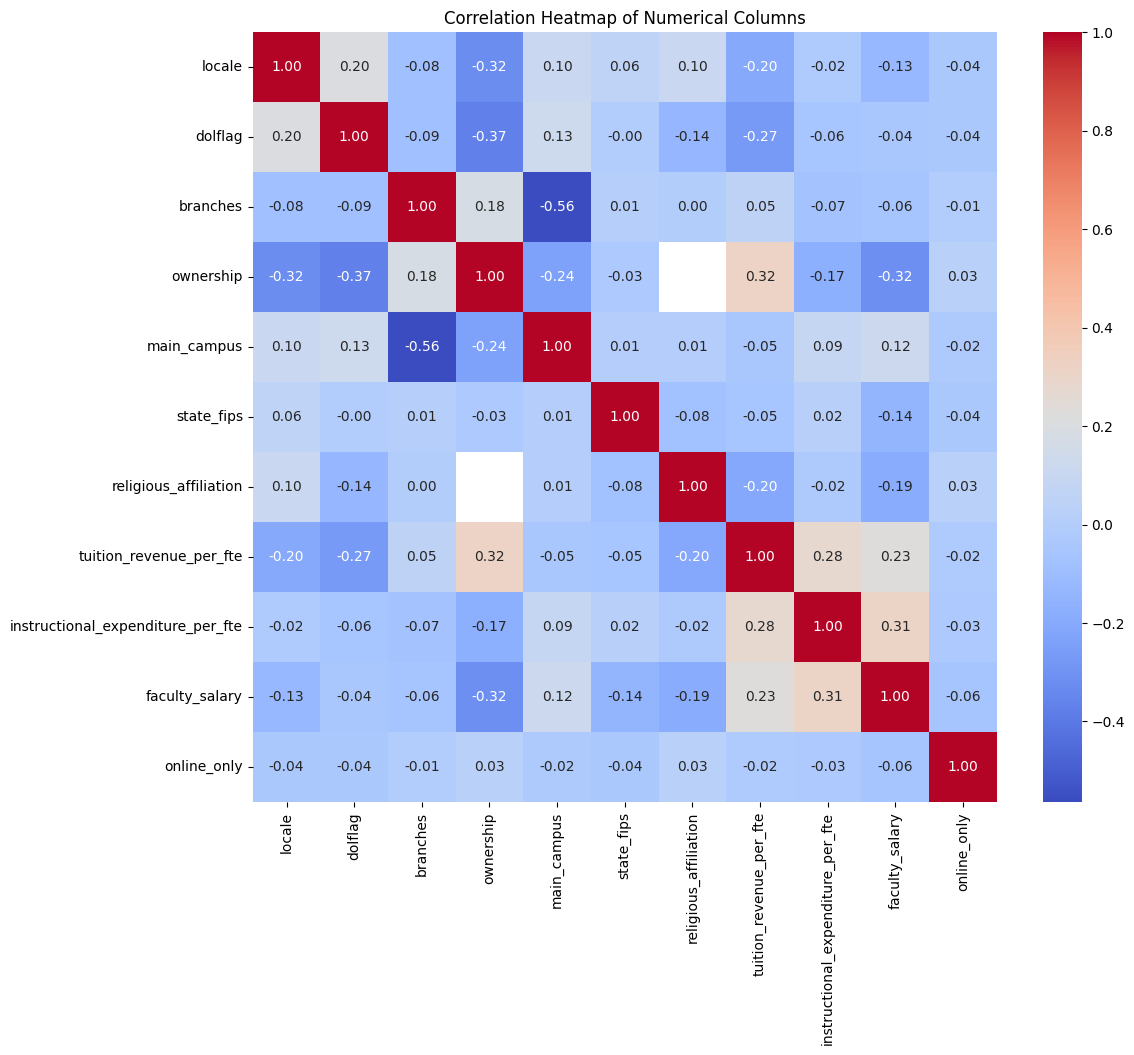

In [107]:
plt.figure(figsize=(12, 10))
sbs.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# Create a bar chart for college ownership distribution

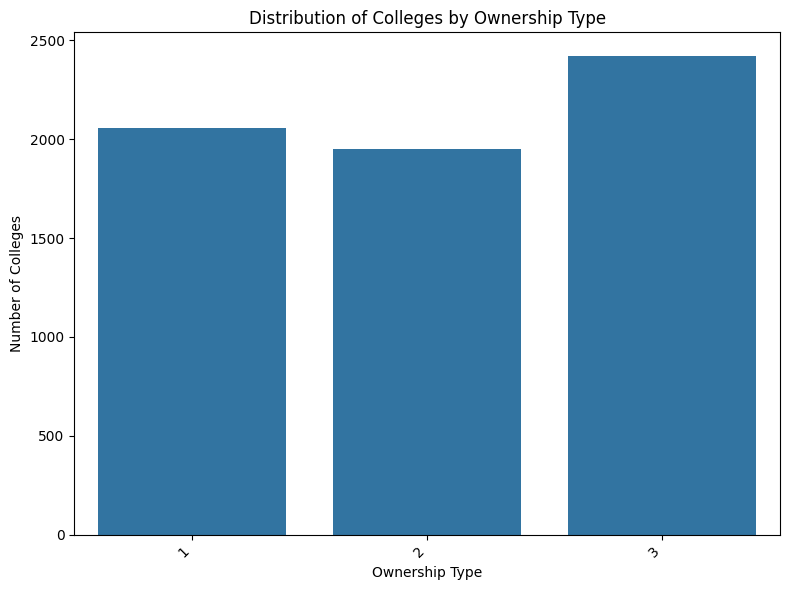

In [104]:
plt.figure(figsize=(8, 6))
sbs.countplot(data=df, x='ownership')
plt.title('Distribution of Colleges by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Number of Colleges')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()